In [2]:
import pandas as pd
import numpy as np

# ensemble learning : 여러개의 분류기를 생성해서 예측하는 방법
## Voting, Bagging(랜덤포레스트), Boosing(에이다부스팅, GBM, XGBoost, LightGBM)
### voting : 서로다른 알고리즘을 가진 분류기를 결합 
### bagging : 분류기가 다같은 알고리즘이지만 데이터 샘플링을 다르게 해서 수행

In [3]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn. neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Voting Classifier

In [4]:
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 양상블 모델로 구현해 보기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf),('KNN', knn_clf)], voting='hard')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state= 156)

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도:{0:.4f}'.format(accuracy_score(y_test, pred)))

Voting 분류기 정확도:0.9386


c:\Users\OPERATOR-70\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
print('lr 정확도 {0}'.format(accuracy_score(pred, y_test).round(4)))
knn_clf.fit(X_train, y_train)
pred = knn_clf.predict(X_test)
print('knn 정확도 {0}'.format(accuracy_score(pred, y_test).round(4)))


lr 정확도 0.9386
knn 정확도 0.9386


c:\Users\OPERATOR-70\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)
rf_clf = RandomForestClassifier()

# 개별 모델을 소프트 보팅 기반의 양상블 모델로 구현해 보기
vo_clf_2 = VotingClassifier(estimators=[('LR', lr_clf),('KNN', knn_clf),], voting='soft')

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state= 156)

vo_clf_2.fit(X_train_2, y_train_2)
pred = vo_clf_2.predict(X_test_2)
print('Voting 분류기 정확도:{0:.4f}'.format(accuracy_score(y_test_2, pred)))



c:\Users\OPERATOR-70\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting 분류기 정확도:0.9474


In [7]:
lr_clf.fit(X_train_2, y_train_2)
pred = lr_clf.predict(X_test)
print('lr 정확도 {0}'.format(accuracy_score(y_test_2,pred).round(4)))
knn_clf.fit(X_train_2, y_train_2)
pred = knn_clf.predict(X_test)
print('knn 정확도 {0}'.format(accuracy_score(y_test_2,pred).round(4)))


lr 정확도 0.9386
knn 정확도 0.9386


c:\Users\OPERATOR-70\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Bagging - 랜덤포레스트
#### n_estimators : 결정트리 지정
#### max_features 결정트리에 사용된 max_features

In [8]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.956140350877193


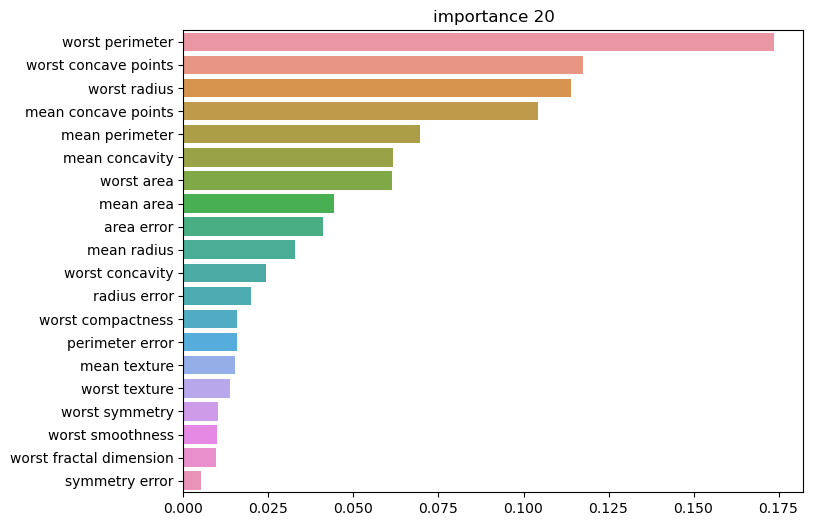

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = data_df.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('importance 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()

In [10]:
from sklearn.model_selection import GridSearchCV
params = { 'n_estimators':[10,20,40,60,80,100,120,140,160,180,200],
            'max_depth':[4,6,8,10,12],
            'min_samples_leaf':[4,8,12,18],
            'min_samples_split': [4,8,16,20]
            }

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 200}
0.9560727258675323


In [11]:
rf_clf1= RandomForestClassifier(n_estimators=200, max_depth= 6,min_samples_split=4,min_samples_leaf=4, random_state=0)

rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.9473684210526315


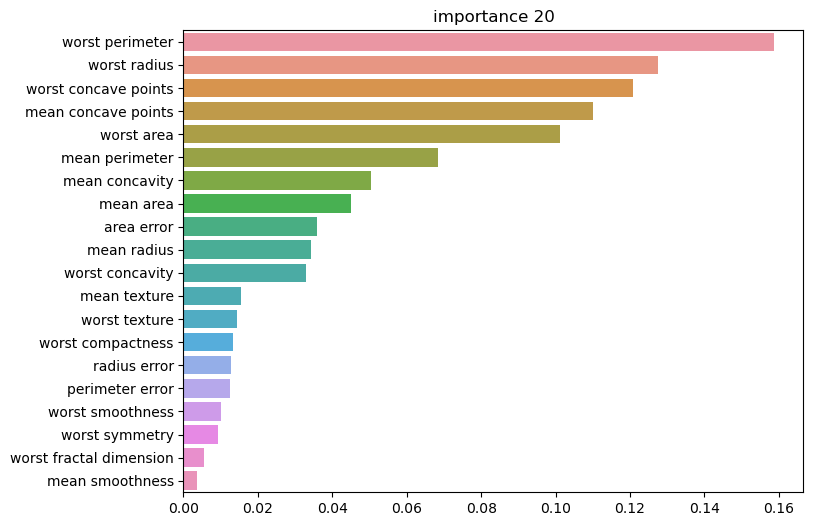

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = data_df.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('importance 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()

# Boosting

### 잘못 예측한 데이터에 가중치를 부여해 오류를 개선해 나가면서 학습

## Ada boost
##### 분류 기준 1,2,3 을 결합한 예측

## GBM
##### 에이다 부스트와 유사하나 가중치를 경사하강법을 이용 >> 시간이 오래걸림 
loss: 경사 하강법에서 사용할 비용 함수를 지정하여 줍니다.

learning_rate: GBM이 학습을 진행할 때마다 적용하는 학습률입니다. 0~1사이의 값으로 지정하며 디폴트 값은 0.1입니다. 이 값을 너무 작게 설정하면 모든 Weak learner가 반복이 완료되어도 최소 오류값을 찾지 못할수도 있습니다. 또 큰 값을 설정하면 최소 오류값을 찾지 못하고 지나쳐 버려서 예측 성능이 떨어지지만 빠른 수행이 가능합니다. 그렇기 때문에 n_estimators 값과 조합하여 보완해 나가며 사용한다고 합니다.

n_estimators: weak learner의 개수입니다. 개수가 많을수록 예측 성능이 일정 수준까지는 좋아지지만 수행 시간이 오래 걸리게 됩니다.

subsample: weak learner가 학습에 사용하게 되는 데이터의 샘플이 비율입니다. 기본값을 1로 전체 학습 데이터를 기반으로 학습하겠다는 의미입니다.

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
import time
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print(gb_accuracy)
print(time.time() - start_time)


0.956140350877193
0.2013261318206787


In [14]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[100,500],
            'learning_rate': [0.05,0.1]}

grid_cv = GridSearchCV(gb_clf , param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print(grid_cv.best_params_)
print(grid_cv.best_score_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
{'learning_rate': 0.1, 'n_estimators': 500}
0.95166743952392


In [15]:
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print(gb_accuracy)

0.9736842105263158


# 서포트 벡터 머신(SVM: Support Vector Machine)
### gamma 증가할수록 결정 경계가 더욱 복잡해지며 인식률 향상 가능
##### 데이터의 양과 특성에 적절한 값을 설정

### C의 값은 학습시 잘못된 분류를 생성할 때 부여하는 벌점
##### 큰 값을 설정하면 오버피팅을 초래
##### 작은 값을 설정하면 언더피팅이 발생
https://hleecaster.com/ml-svm-concept/

In [16]:
from sklearn import svm
clf = svm.SVC(gamma=0.0001, C=10000.)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8947368421052632


# KNN 알고리즘
### 거리안에서 가장많은 종류가 있는 클래스로 분류

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# X_train 의 데이터 개수가 n_neighbors 의 한계값
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
scores = metrics.accuracy_score(y_test, y_pred)
scores

0.956140350877193

# 로지스틱 회귀분석

### 시그모이드 함수의 최적선을 잡고 함수의 반환값을 확률로 간주해 분류 결정
https://nittaku.tistory.com/478


In [18]:

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)

lr_preds = lr_clf.predict(X_test)
print(accuracy_score(y_test, lr_preds))


0.9385964912280702


c:\Users\OPERATOR-70\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l2', 'l1']}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_cv.fit(X_train, y_train)
print(grid_cv.best_params_)
print(grid_cv.best_score_)



Fitting 2 folds for each of 4 candidates, totalling 8 fits
{'learning_rate': 0.1, 'n_estimators': 500}
0.95166743952392
